# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import nltk

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:

df = pd.read_csv("F:/Data science/Assignment/11_Text mining/Elon_musk.csv", encoding="ISO-8859-1")
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# remove punctuation and convert to lowercase
df['Text_cleaned'] = df['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

# tokenize the text
df['Text_tokenized'] = df['Text_cleaned'].apply(lambda x: word_tokenize(x))

# remove stop words and lemmatize the words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['Text_cleaned'] = df['Text_tokenized'].apply(remove_stopwords)
df['Text_cleaned'] = df['Text_cleaned'].apply(lemmatize_tokens)


In [9]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [10]:
from textblob import TextBlob

def get_sentiment(Text):
    return TextBlob(Text).sentiment.polarity

df['sentiment'] = df['Text_cleaned'].apply(lambda x: get_sentiment(' '.join(x)))


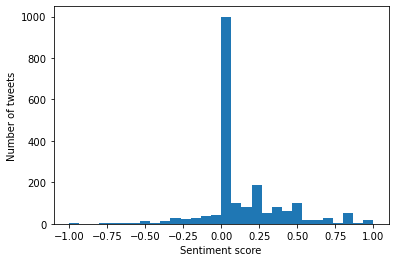

In [47]:
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins=30)
plt.xlabel('Sentiment score')
plt.ylabel('Number of tweets')
plt.show()


In [11]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


# Extract reviews of any product from ecommerce website like amazon

In [17]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import io


In [18]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [27]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [24]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [28]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [29]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break


C:\Users\Win\AppData\Local\Temp\ipykernel_6080\733389603.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

ConnectionError: HTTPSConnectionPool(host='www.amazon.in', port=443): Max retries exceeded with url: /OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/%20%20%20%20ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=346&url=https%3A%2F%2Fwww.amazon.in%2FOnePlus-Nord-Mirror-128GB-Storage%2Fproduct-reviews%2FB09RG132Q5%2F++++ref%3Dcm_cr_arp_d_paging_btm_next_2%3Fie%3DUTF8%26reviewerType%3Dall_reviews%26pageNumber%3D346&wait=2 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000258B948C190>: Failed to establish a new connection: [WinError 10065] A socket operation was attempted to an unreachable host'))

In [ ]:
data = pd.read_csv(io.StringIO(response.text))


In [24]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,5.0,Best Budget Phone from OnePlus,Feedback is on the basis of 2 Weeks of use of ...,28 July 2022
2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28 March 2023
3,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
4,4.0,Nice 5G phone at a decent price,"I loved the colour (sky blue), which looked ex...",2 April 2023
5,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
6,4.0,Great purchase in 19k,Very good phone below 20kPros: 3.5 mm jack5gWi...,6 April 2023
7,4.0,Good Product,"Great device, but as One-entry-level plus's of...",24 March 2023
8,4.0,5G is working 😃,Performance is good no lag in day to day usesI...,19 March 2023
9,4.0,Features,I like the phone very much camera is very good...,9 April 2023


In [26]:
df.to_csv("F:/Data science/Assignment/11_Text mining/Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [31]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-d

In [5]:
# load the dataset
reviews=pd.read_csv('F:/Data science/Assignment/11_Text mining/Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,5.0,Best Budget Phone from OnePlus,Feedback is on the basis of 2 Weeks of use of ...,28 July 2022
2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28 March 2023
3,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
4,4.0,Nice 5G phone at a decent price,"I loved the colour (sky blue), which looked ex...",2 April 2023
5,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
6,4.0,Great purchase in 19k,Very good phone below 20kPros: 3.5 mm jack5gWi...,6 April 2023
7,4.0,Good Product,"Great device, but as One-entry-level plus's of...",24 March 2023
8,4.0,5G is working 😃,Performance is good no lag in day to day usesI...,19 March 2023
9,4.0,Features,I like the phone very much camera is very good...,9 April 2023


In [6]:
reviews.Rating.describe()

count    10.000000
mean      4.100000
std       0.316228
min       4.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

In [36]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,Feedback is on the basis of 2 Weeks of use of ...,136
2,"I am posting a review after 7 days of used,Pro...",129
3,I will try to keep this review short. This rev...,216
4,"I loved the colour (sky blue), which looked ex...",108


In [7]:
#Number of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I've purchased the 6GB version of this phone w...,1715
1,Feedback is on the basis of 2 Weeks of use of ...,773
2,"I am posting a review after 7 days of used,Pro...",700
3,I will try to keep this review short. This rev...,1189
4,"I loved the colour (sky blue), which looked ex...",602


In [8]:
#Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I've purchased the 6GB version of this phone w...,4.755034
1,Feedback is on the basis of 2 Weeks of use of ...,4.691176
2,"I am posting a review after 7 days of used,Pro...",4.434109
3,I will try to keep this review short. This rev...,4.509259
4,"I loved the colour (sky blue), which looked ex...",4.583333


In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I've purchased the 6GB version of this phone w...,128
1,Feedback is on the basis of 2 Weeks of use of ...,54
2,"I am posting a review after 7 days of used,Pro...",53
3,I will try to keep this review short. This rev...,94
4,"I loved the colour (sky blue), which looked ex...",36


In [10]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I've purchased the 6GB version of this phone w...,0
1,Feedback is on the basis of 2 Weeks of use of ...,0
2,"I am posting a review after 7 days of used,Pro...",0
3,I will try to keep this review short. This rev...,0
4,"I loved the colour (sky blue), which looked ex...",0


In [11]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I've purchased the 6GB version of this phone w...,2
1,Feedback is on the basis of 2 Weeks of use of ...,2
2,"I am posting a review after 7 days of used,Pro...",2
3,I will try to keep this review short. This rev...,0
4,"I loved the colour (sky blue), which looked ex...",3


In [12]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I've purchased the 6GB version of this phone w...,4
1,Feedback is on the basis of 2 Weeks of use of ...,0
2,"I am posting a review after 7 days of used,Pro...",2
3,I will try to keep this review short. This rev...,3
4,"I loved the colour (sky blue), which looked ex...",8


In [16]:
reviews.drop(['numerics','stopwords','avg_word','char_count','upper'],axis=1,inplace=True)

In [17]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    Feedback is on the basis of 2 Weeks of use of ...
2    I am posting a review after 7 days of used,Gro...
3    I will try to keep this review short. His revi...
4    I loved the colour (sky blue), which looked ex...
Name: Review, dtype: object

In [18]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0    19
1    28
2    28
3    12
4     2
5     5
6     6
7    24
8    19
9     9
Name: Review_Date, dtype: object 
 0    December
1        July
2       March
3     January
4       April
5     January
6       April
7       March
8       March
9       April
Name: Review_Date, dtype: object 
 0    2022
1    2022
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: Review_Date, dtype: object


In [19]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,19,December,2022
1,28,July,2022
2,28,March,2023
3,12,January,2023
4,2,April,2023
5,5,January,2023
6,6,April,2023
7,24,March,2023
8,19,March,2023
9,9,April,2023


In [20]:
df.Month.value_counts()

March       3
April       3
January     2
December    1
July        1
Name: Month, dtype: int64

In [21]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,December
1,July
2,3
3,January
4,4
5,January
6,4
7,3
8,3
9,4


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
 4   hashtags     10 non-null     int64  
 5   Date         10 non-null     object 
 6   Month        10 non-null     object 
 7   Year         10 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 768.0+ bytes


In [23]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
 4   hashtags     10 non-null     int64  
 5   Date         10 non-null     int64  
 6   Month        10 non-null     object 
 7   Year         10 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 768.0+ bytes


In [24]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,hashtags,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,0,19,December,2022
1,5.0,Best Budget Phone from OnePlus,Feedback is on the basis of 2 Weeks of use of ...,0,28,July,2022
2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",0,28,3,2023
3,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,0,12,January,2023
4,4.0,Nice 5G phone at a decent price,"I loved the colour (sky blue), which looked ex...",0,2,4,2023


In [25]:
df

,Rating,Title,Review,Review_Date,hashtags,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,0,19,December,2022
1,5.0,Best Budget Phone from OnePlus,Feedback is on the basis of 2 Weeks of use of ...,28 July 2022,0,28,July,2022
2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28 March 2023,0,28,March,2023
3,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,0,12,January,2023
4,4.0,Nice 5G phone at a decent price,"I loved the colour (sky blue), which looked ex...",2 April 2023,0,2,April,2023
5,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023,0,5,January,2023
6,4.0,Great purchase in 19k,Very good phone below 20kPros: 3.5 mm jack5gWi...,6 April 2023,0,6,April,2023
7,4.0,Good Product,"Great device, but as One-entry-level plus's of...",24 March 2023,0,24,March,2023
8,4.0,5G is working 😃,Performance is good no lag in day to day usesI...,19 March 2023,0,19,March,2023
9,4.0,Features,I like the phone very much camera is very good...,9 April 2023,0,9,April,2023


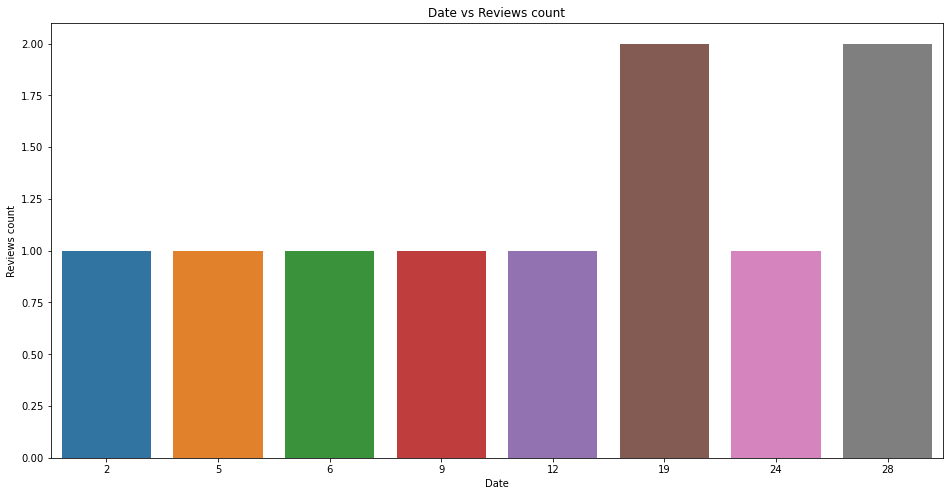

In [26]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

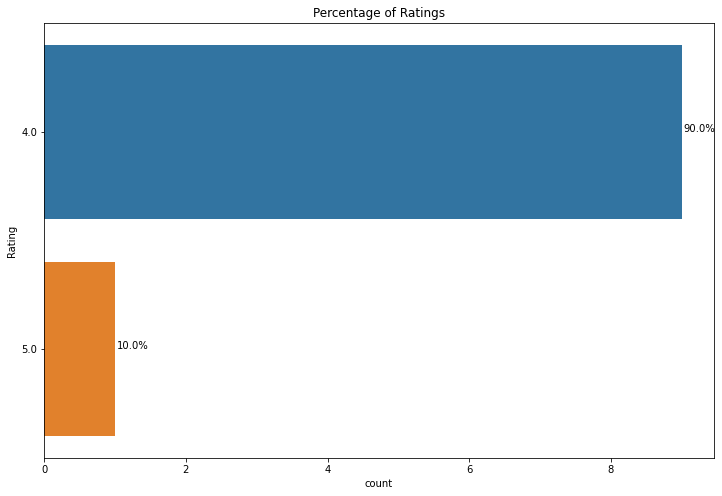

In [27]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [29]:
data = df[['Review']]
data

,Review
0,I've purchased the 6GB version of this phone w...
1,Feedback is on the basis of 2 Weeks of use of ...
2,"I am posting a review after 7 days of used,Pro..."
3,I will try to keep this review short. This rev...
4,"I loved the colour (sky blue), which looked ex..."
5,This is definitely a budget branded phone 📱 af...
6,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,"Great device, but as One-entry-level plus's of..."
8,Performance is good no lag in day to day usesI...
9,I like the phone very much camera is very good...


In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))
data

,Review
0,i've purchased 6gb version phone comes extenda...
1,feedback basis 2 weeks use phone. bought sale ...
2,"posting review 7 days used,pros :battery good,..."
3,try keep review short. review perspective aver...
4,"loved colour (sky blue), looked exceptional op..."
5,definitely budget branded phone 📱 1 month 22 d...
6,good phone 20kpros: 3.5 mm jack5gwith chargerd...
7,"great device, one-entry-level plus's offering,..."
8,performance good lag day day usesi basically t...
9,like phone much camera good charge back bad.


In [32]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [33]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."


In [34]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [35]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [36]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [37]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [38]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [39]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [40]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [41]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [42]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [43]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...
9,like phone much camera good charge back bad,I like the phone very much camera is very good...


In [44]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
1,feedback basis week use phone bought sale best...,Feedback is on the basis of 2 Weeks of use of ...,"[feedback, basis, week, use, phone, bought, sa..."
2,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro...","[posting, review, day, used, pro, battery, goo..."
3,try keep review short review perspective avera...,I will try to keep this review short. This rev...,"[try, keep, review, short, review, perspective..."
4,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex...","[loved, colour, sky, blue, looked, exceptional..."
5,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,"[definitely, budget, branded, phone, month, da..."
6,good phone kpros mm jack gwith chargerdecent c...,Very good phone below 20kPros: 3.5 mm jack5gWi...,"[good, phone, kpros, mm, jack, gwith, chargerd..."
7,great device one entry level plus offering min...,"Great device, but as One-entry-level plus's of...","[great, device, one, entry, level, plus, offer..."
8,performance good lag day day usesi basically t...,Performance is good no lag in day to day usesI...,"[performance, good, lag, day, day, usesi, basi..."
9,like phone much camera good charge back bad,I like the phone very much camera is very good...,"[like, phone, much, camera, good, charge, back..."
